In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import glob

# search all files inside a specific folder
# *.* means file name with any extension
dir_path = r'Data/Consumers/processed/*.csv'
res = glob.glob(dir_path)

In [3]:
dict_df={}
sel_col=['States_UTs','Total']
for files in res:
    yr=files[-8:-4]
    
    dict_df[yr]=pd.read_csv(files,index_col=0)
    dict_df[yr].drop('States_UTs',axis=1,inplace=True)
    print(files[-8:-4])

2014
2015
2016
2017
2020
2021


In [7]:
temp={}
for key, value_df in dict_df.items():
    temp[key]=value_df.shape[0]
key_max = max(temp, key=temp.get)

del temp[key_max]
year_ind_df=pd.DataFrame()
year_ind_df[key_max]=dict_df[key_max].sum(axis=0)

for key,value in temp.items():
    year_ind_df[key]=dict_df[key].sum(axis=0)
year_ind_df['2018']=np.NaN
year_ind_df['2019']=np.NaN

order=['2014','2015','2016','2017','2018','2019','2020','2021']
year_ind_df=year_ind_df[order]
year_ind_df=year_ind_df.T

In [8]:
year_ind_df

,Domestic,Commercial,Industrial_LV,Industrial_HV,Public_Light,Traction,Agriculture,Public_Water,Miscellaneous,Total
2014,170484202.0,21740584.0,3254645.0,154312.0,941285.0,1264.0,18955924.0,726324.0,4116066.0,220477500.0
2015,185679641.0,22135877.0,3365551.0,145259.0,996811.0,1189.0,20242437.0,813813.0,3316400.0,236696978.0
2016,194208088.0,23017815.0,3421816.0,145680.0,1035585.0,953.0,20918824.0,854083.0,1841877.0,245437573.0
2017,202521013.0,23157463.0,3353640.0,149884.0,1313709.0,1024.0,21975003.0,622426.0,2956486.0,256050648.0
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020,252001024.0,28146658.0,3627260.0,180697.0,1514654.0,754.0,25418693.0,784664.0,2748800.0,314423204.0
2021,258309177.0,29220864.0,3712670.0,188908.0,1532875.0,760.0,26253015.0,850994.0,3046778.0,323116041.0


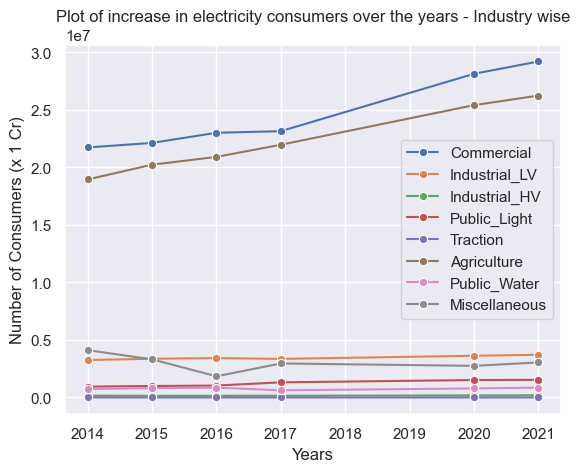

In [12]:
sns.set(style="darkgrid")
#markers_color = ['green','green','green','green','red','red','green','green']

for cols in year_ind_df.columns[1:-1]:
    sns.lineplot(data=year_ind_df,x=year_ind_df.index,y=cols,marker='o',label=cols)

plt.xlabel("Years")
plt.ylabel("Number of Consumers (x 1 Cr)")
plt.title("Plot of increase in electricity consumers over the years - Industry wise")
plt.savefig('Data/images/Cons_Ind.png',dpi=400)
plt.show()